In [11]:
import os

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [4]:
def open_file(path):
  """
  path : str, el path relativo a este documento
  Esta función lee el dataset para su modelación
  """
  dataset = pd.read_csv(path, index_col=0)
  return dataset

In [8]:
def plot_metric(K, scores, metric_name):
  """
  K: rango de enteros, número de clústers en el modelo a evaluar, se puede entregar por medio de una lista o por medio de range(a,b)
  scores: listas, donde se encuentran los scores de cada uno de los modelos evaluados
  metric_name: str, nombre para desplegar en el gráfico.  
  """
  plt.figure(dpi=110, figsize=(9, 5))
  plt.plot(K, scores, 'bx-')
  plt.xticks(K); plt.xlabel('$k$', fontdict=dict(family = 'serif', size = 14));  plt.ylabel(metric_name, fontdict=dict(family = 'serif', size = 14));
  plt.title(f'K vs {metric_name}', fontdict=dict(family = 'serif', size = 18))
  plt.show()

In [12]:
def plot_evaluation(K, dataset):
  """
  K: rango de enteros, debe coincidir con plot_metric
  dataset: dataset cargado con las features correspondientes
  """
  inertia = []
  silhouette = []

  for i in K:
    # Declaramos y ejecutamos el algoritmo K-means.
    model = KMeans(n_clusters=i, random_state=2021)
    model.fit(dataset)

    # Predecimos las etiquetas de X_preprocessed.
    y = model.predict(dataset)

    # Almacenamos la métrica de inercia y el coeficiente de silueta.
    inertia.append(model.inertia_)
    silhouette.append(silhouette_score(dataset, y))

  return inertia, silhouette

In [ ]:
dataset = open_file("df_features_emolex.csv")

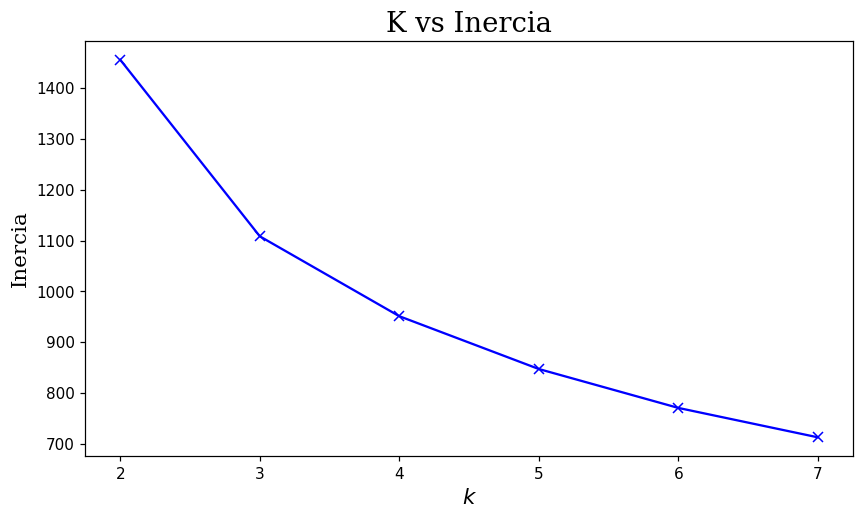

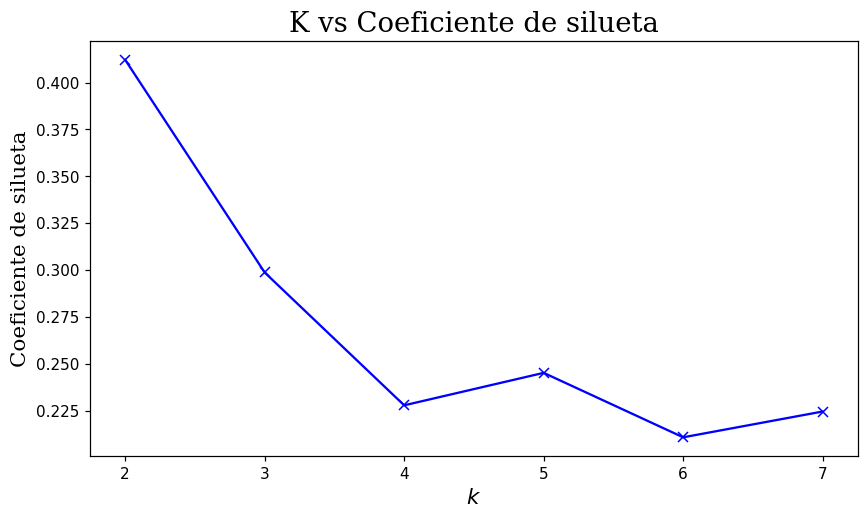

In [14]:
inertia, silhouette = plot_evaluation(range(2,8), dataset)

plot_metric(range(2,8), inertia, 'Inercia')
plot_metric(range(2,8), silhouette, 'Coeficiente de silueta')